<a href="https://colab.research.google.com/github/Reemaa-SR/Computer-Vision-projects/blob/main/Homography_Applications_Scanning_App_Reemaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

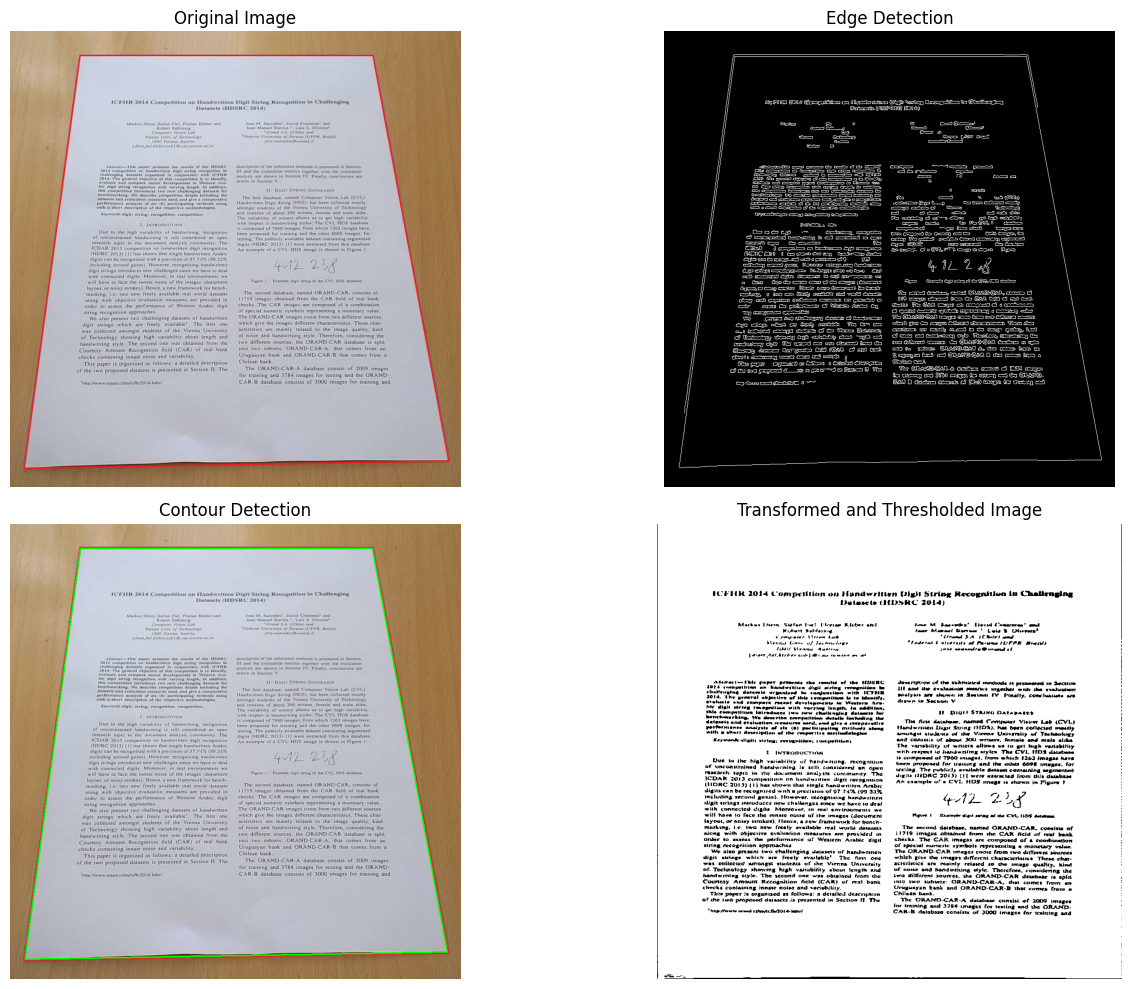

In [ ]:
import cv2
import numpy as np
import urllib
from matplotlib import pyplot as plt

# Function to download and load an image from a URL into OpenCV
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

# Replace the URL below with the URL of your image
image_url = 'https://cvl.tuwien.ac.at/wp-content/uploads/2015/10/dewarp4marked.png'
image = url_to_image(image_url)

# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges and find contours
edged = cv2.Canny(gray_blurred, 75, 200)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

# Loop over the contours and find the best one that represents the page
for c in contours:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)

    # If our approximated contour has four points, we can assume we have found the page
    if len(approx) == 4:
        screenCnt = approx
        break

# Apply the perspective transformation (homography)
pts = screenCnt.reshape(4, 2)
rect = np.zeros((4, 2), dtype="float32")

s = pts.sum(axis=1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis=1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]

(tl, tr, br, bl) = rect

# Compute the width and height of the new image
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))

heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))

dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]], dtype="float32")

M = cv2.getPerspectiveTransform(rect, dst)
warped = cv2.warpPerspective(gray, M, (maxWidth, maxHeight))

# Apply Otsu's thresholding
_, final = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.axis('off')
plt.imshow(edged, cmap='gray')
plt.title('Edge Detection')

# Draw the contour of the page on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, [screenCnt], -1, (0, 255, 0), 2)
plt.subplot(2, 2, 3)
plt.axis('off')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')

plt.subplot(2, 2, 4)
plt.axis('off')
plt.imshow(final, cmap='gray')
plt.title('Transformed and Thresholded Image')

plt.tight_layout()
plt.show()


In [1]:
import cv2
import numpy as np
import urllib
from matplotlib import pyplot as plt

In [2]:
# Function to download and load an image from a URL into OpenCV
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [3]:
# Replace the URL below with the URL of your image
image_url = 'https://cvl.tuwien.ac.at/wp-content/uploads/2015/10/dewarp4marked.png'
image = url_to_image(image_url)


In [5]:
image.shape

(887, 878, 3)

In [6]:
# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)